2023-05-19    24.598091
2023-05-20    24.561703
2023-05-21    24.537101
2023-05-22    24.519483
2023-05-23    24.505958
2023-05-24    24.494907
2023-05-25    24.485405
2023-05-26    24.476895
2023-05-27    24.469031
2023-05-28    24.461592
2023-05-29    24.454435
2023-05-30    24.447468
2023-05-31    24.440630
2023-06-01    24.433881
2023-06-02    24.427196
2023-06-03    24.420556
2023-06-04    24.413952
2023-06-05    24.407376
2023-06-06    24.400823
2023-06-07    24.394290
2023-06-08    24.387775
2023-06-09    24.381277
2023-06-10    24.374795
2023-06-11    24.368327
2023-06-12    24.361875
2023-06-13    24.355436
2023-06-14    24.349012
2023-06-15    24.342603
2023-06-16    24.336207
2023-06-17    24.329825
Freq: D, Name: Lần cuối, dtype: float64


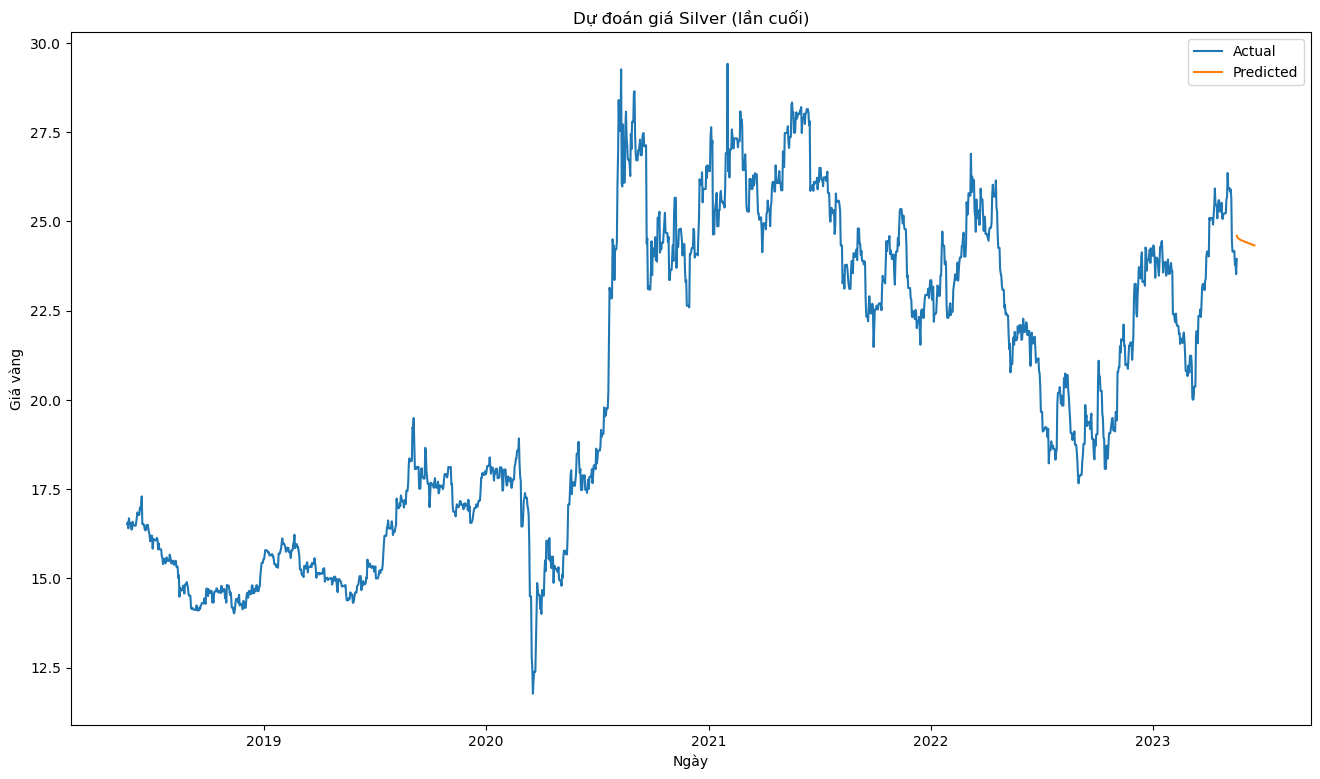

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data_Silver = pd.read_csv("./data/SilverData.csv", na_values=['null'], index_col='Ngày', parse_dates=True, infer_datetime_format=True)
data_Silver = data_Silver.drop('KL', axis=1)
data_Silver.dropna(inplace=True)

# Chuyển đổi thành tần suất hàng ngày
data_Silver = data_Silver.resample('D').ffill()

# Chia tập train-test-validate theo tỉ lệ 5:3:2
train_size = int(len(data_Silver) * 0.5)
val_size = int(len(data_Silver) * 0.2)  # 10% dữ liệu cho tập validate
test_size = len(data_Silver) - train_size - val_size

train_data = data_Silver[:train_size].copy()
val_data = data_Silver[train_size:train_size+val_size].copy()
test_data = data_Silver[train_size+val_size:].copy()

# Huấn luyện mô hình VAR trên tập train
model = VAR(train_data)
model_fit = model.fit()

# Dự đoán giá vàng trong 30 ngày tiếp theo
forecast = model_fit.forecast(model_fit.endog, steps=30)
last_date = data_Silver.index[-1]
date_range = pd.date_range(start=last_date, periods=30, freq='D')
predictions = pd.DataFrame(forecast, index=date_range, columns=data_Silver.columns)
predicted_Silver_prices = predictions['Lần cuối']

# In kết quả dự đoán
print(predicted_Silver_prices)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(16, 9))
plt.plot(data_Silver.index, data_Silver['Lần cuối'], label='Actual')
plt.plot(predicted_Silver_prices.index, predicted_Silver_prices, label='Predicted')
plt.title('Dự đoán giá Silver (lần cuối)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()

## Đánh giá mô hình

In [2]:
# Tính toán các chỉ số đánh giá
actual_prices = test_data['Lần cuối']
mae = np.mean(np.abs(predicted_Silver_prices - actual_prices))
rmse = np.sqrt(np.mean((predicted_Silver_prices - actual_prices)**2))
mape = np.mean(np.abs((predicted_Silver_prices - actual_prices) / actual_prices)) * 100

# In kết quả đánh giá
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.6500908098525038
Root Mean Squared Error (RMSE): 0.6500908098525038
Mean Absolute Percentage Error (MAPE): 2.7145933265930506
